In [1]:
# coding:utf-8
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import datasets
import json
import math
import datetime
import numpy as np

def time_long(timeStamp):
    """
    计算时间差
    :param timeStamp: 时间戳
    :return: 相差的天数
    """
    timeStamp = int(str(timeStamp)[:-3])
    dateArray = datetime.datetime.fromtimestamp(timeStamp)
    dd = dateArray.strftime("%Y-%m-%d")
    dd = datetime.datetime.strptime(dd, "%Y-%m-%d")
    d1 = datetime.datetime(2009, 1, 3)
    day_num = (dd - d1).days
    return int(abs(day_num))


def analysisJsonData():
    print('解析数据')
    dataMat = []; labelMat = []; origData = []
    # 读取数据
    with open(r'btc_price.txt', 'r') as f:
        datas = json.load(f)
    
    for dic in datas['data']['items']:
        dataMat.append([math.log(1.0, 10), math.log(time_long(dic['timestamp']), 10)])  # 开始加入的1.0就是X0，对应参数W0
        labelMat.append(dic['close'])
        origData.append(time_long(dic['timestamp']))

    return dataMat, labelMat, origData

解析数据
Training set score: 0.93
Test set score: 0.93
[0.         5.82789223]
-16.957799734904945
MSE_pre: 0.12349372786061588
RMSE_pre: 0.35141674385352767
MSE: 0.11887940466531809
RMSE: 0.34478892770116343
MSE_2: 0.11966383807561337
RMSE_2: 0.34592461328389656


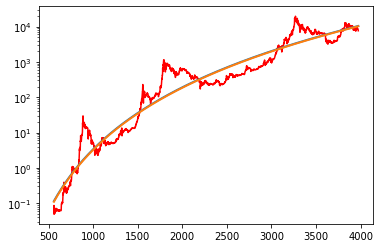

In [20]:
dataMat, labelMat, origData = analysisJsonData()
labelMats = []
for i in labelMat:
    labelMats.append(math.log(i,10))
X_train, X_test, y_train, y_test = train_test_split(dataMat, labelMats, test_size=0.2, random_state=1)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print(lr.coef_)
print(lr.intercept_)
from sklearn.model_selection import cross_val_predict 
### 交叉验证   若cv=5,把训练集平均分成5份，其中4份作为训练集，剩余的一份作为验证集，一共有5中组合方式， 
cross_predict = cross_val_predict(lr,X_train,y_train,cv=5)

print ("MSE_pre:",metrics.mean_squared_error(y_train,cross_predict)) 
print('RMSE_pre:',np.sqrt(metrics.mean_squared_error(y_train,cross_predict))) 
w = lr.coef_.tolist()[1]
b = float(lr.intercept_)
y_pred = lr.predict(X_test)
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('MSE:', MSE)
print('RMSE:', RMSE)

# 使用别人的模型测试预测数据，利用平方差和均方差根
w0,w1 = np.array(X_test).T
X_test_other = w1
y_pred_other = 5.84*X_test_other-17.01
MSE_2 = metrics.mean_squared_error(y_test, y_pred_other)
RMSE_2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_other))
print('MSE_2:', MSE_2)     #MSE_2: 0.11966383807561337
print('RMSE_2:', RMSE_2)   #RMSE_2: 0.34592461328389656

# 画曲线，纵坐标还是币价，是一个曲线价格曲线，横坐标还是天数
plt.plot(origData, 10**np.array(labelMats), 'red')
price_list = []
for line in origData:
    price_list.append(10**(w*math.log(line,10)+b))
plt.semilogy(origData, price_list,lw=2)

# 和别人的对比
other_price_list = []
for line in origData:
    other_price_list.append(10 ** (5.84 * math.log(line, 10) - 17.01))
plt.semilogy(origData, other_price_list, lw=2)
plt.show()


Training set score: 0.93
Test set score: 0.93
[0.         5.82746656]
-16.9563922969652
MSE_pre: 0.12349376026652266
RMSE_pre: 0.35141678996104136
MSE: 0.11887674546509469
RMSE: 0.34478507140694864
MSE_2: 0.11966383807561337
RMSE_2: 0.34592461328389656


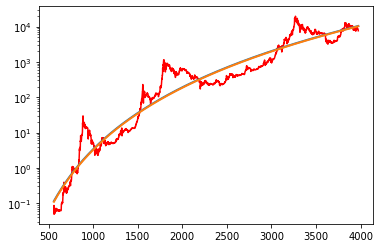

In [21]:
'''
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 7, 10, 30,100, 200])
ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)  # 0.1 
'''

ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print(ridge.coef_)
print(ridge.intercept_)
cross_predict = cross_val_predict(ridge,X_train,y_train,cv=5)

print ("MSE_pre:",metrics.mean_squared_error(y_train,cross_predict)) 
print('RMSE_pre:',np.sqrt(metrics.mean_squared_error(y_train,cross_predict))) 
w = ridge.coef_.tolist()[1]
b = float(ridge.intercept_)
y_pred = ridge.predict(X_test)
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('MSE:', MSE)
print('RMSE:', RMSE)

# 使用别人的模型测试预测数据，利用平方差和均方差根
w0,w1 = np.array(X_test).T
X_test_other = w1
y_pred_other = 5.84*X_test_other-17.01
MSE_2 = metrics.mean_squared_error(y_test, y_pred_other)
RMSE_2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_other))
print('MSE_2:', MSE_2)     #MSE_2: 0.11966383807561337
print('RMSE_2:', RMSE_2)   #RMSE_2: 0.34592461328389656

# 画曲线，纵坐标还是币价，是一个曲线价格曲线，横坐标还是天数
plt.plot(origData, 10**np.array(labelMats), 'red')
price_list = []
for line in origData:
    price_list.append(10**(w*math.log(line,10)+b))
plt.semilogy(origData, price_list,lw=2)

# 和别人的对比
other_price_list = []
for line in origData:
    other_price_list.append(10 ** (5.84 * math.log(line, 10) - 17.01))
plt.semilogy(origData, other_price_list, lw=2)
plt.show()

Training set score: 0.93
Test set score: 0.94
Number of features used: 1
[0.        5.7281125]
-16.62788617732808
MSE: 0.11876567909701435
RMSE: 0.3446239676763854
MSE_2: 0.11966383807561337
RMSE_2: 0.34592461328389656


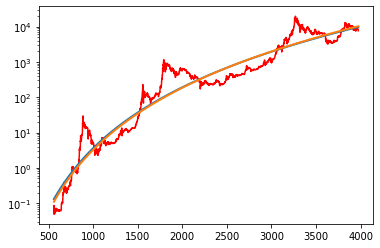

In [12]:
from sklearn.linear_model import Lasso
lasso00001 = Lasso(alpha=0.005, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))
print(lasso00001.coef_)
print(lasso00001.intercept_)
w = lasso00001.coef_.tolist()[1]
b = float(lasso00001.intercept_)

y_pred = lasso00001.predict(X_test)
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('MSE:', MSE)
print('RMSE:', RMSE)

# 使用别人的模型测试预测数据，利用平方差和均方差根
w0,w1 = np.array(X_test).T
X_test_other = w1
y_pred_other = 5.84*X_test_other-17.01
MSE_2 = metrics.mean_squared_error(y_test, y_pred_other)
RMSE_2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_other))
print('MSE_2:', MSE_2)     #MSE_2: 0.11966383807561337
print('RMSE_2:', RMSE_2)   #RMSE_2: 0.34592461328389656

# 画曲线，纵坐标还是币价，是一个曲线价格曲线，横坐标还是天数
plt.plot(origData, 10**np.array(labelMats), 'red')
price_list = []
for line in origData:
    price_list.append(10**(w*math.log(line,10)+b))
plt.semilogy(origData, price_list,lw=2)

# 和别人的对比
other_price_list = []
for line in origData:
    other_price_list.append(10 ** (5.84 * math.log(line, 10) - 17.01))
plt.semilogy(origData, other_price_list, lw=2)
plt.show()